# Project: Appointment Show up in Brazil- MachineLearning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Pre-processing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#mod">Modelling</a></li>  
<li><a href="#report">Report</a></li> 
</ul>

<a id='intro'></a>
## Introduction

> The goal of this project is to analyse data related to medical appointments made by people leaving in Brazil. This project focuses on using machine learning models to predict whether or not patients will show up for their scheduled appointment. The given data has 110527 entries and 14 features. \

> Firstly, the data is accessed and explored before cleaning since understanding the data helps to know what questions to ask or which questions needs to be address. Some of the questions to consider for this prediction are:
- Which gender shows up more and does gender influence or affect show up fro medical appointment?
- Does scholarship influence or affect show up?
- Which age class shows up more and does the age affect the show up?
- Does people who receive sms message show up?
- Does the neighborhood a patient live in affect show up? 
- Does the day of the weekand month the appointment was made or scheduled influence show up?
- Does gender and age class affect show up?
> Then, new features are created, remove outliers, check for missing values and impute them if neccesary, check distributions and correlation plot before building a machine learning to predict show up


In [1]:
#importing important libraries for my data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline




**Outline**
- importing data
- check the data type for all columns and transform them if necessary
- Create new features
- removing outliers
- Check for missing values and impute them if neccesary
- checking distributions, correlation plot
- Modeling: RandomForest regression, Linear Regression, Logistics regression, KNN

<a id='wrangling'></a>
## Data Wrangling and Preprocessing
Access, explore and clean data by dropping irrelevant columns, remove duplicates and change datatype of AppointmentDay column. 

In [13]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
2419,6.385377e+12,5591009,M,2016-04-15T15:36:06Z,2016-04-29T00:00:00Z,12,MONTE BELO,0,0,0,0,0,1,No
31353,7.845341e+14,5640517,F,2016-04-29T10:52:17Z,2016-05-06T00:00:00Z,25,DO MOSCOSO,0,0,0,0,0,0,Yes
94209,8.446636e+10,5751568,M,2016-05-31T10:20:10Z,2016-06-02T00:00:00Z,43,DO QUADRO,0,0,0,0,0,0,No
54737,9.642939e+14,5715859,M,2016-05-18T15:15:47Z,2016-05-18T00:00:00Z,8,SANTA MARTHA,0,0,0,0,0,0,Yes
98530,6.538462e+12,5752314,F,2016-05-31T11:31:36Z,2016-06-02T00:00:00Z,70,JOANA D´ARC,0,0,0,0,0,0,No
98656,4.259755e+12,5676955,F,2016-05-09T17:01:46Z,2016-06-07T00:00:00Z,61,MARIA ORTIZ,0,0,0,0,0,1,Yes
24478,7.264849e+12,5637896,M,2016-04-29T07:30:03Z,2016-05-03T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,1,No
84790,7.813589e+14,5613479,F,2016-04-25T09:21:12Z,2016-06-07T00:00:00Z,21,BONFIM,0,0,0,0,0,0,No
62207,7.689142e+13,5549316,M,2016-04-06T09:44:15Z,2016-05-11T00:00:00Z,21,JABOUR,0,0,0,0,0,1,No
53,4.438587e+14,5637909,M,2016-04-29T07:30:31Z,2016-04-29T00:00:00Z,6,CONQUISTA,0,0,0,0,0,0,No


In [4]:
#Determining the number of people in the data and number of info about each person
df.shape


(110527, 14)

In [5]:
#Check the data types of my features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
#Check to see how many row are duplicated
df.duplicated().sum()
#len(df)-len(df.drop_duplicates())

## To Do:
- Create new features for ScheduledDay and AppointmentDay by extracting the month and day of week.
- Drop and ScheduledDay, AppointmentDay, AppointmentID and PatientId
- Rename No-show column to show and convert the categorical variable to numeric (binary)
- Convert the Gender categorical variable to numeric (binary) with Male= 1 and Female=0


In [14]:
#renaming the No-Show column to make it convenient for access
df=df.rename(columns={'No-show':'show'})
# Yes represent the No show and No represents show up which is assigned to 0 and 1 respectively
df['show'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True)

In [28]:
#Convert the Gender categorical variable to numeric(binary) with Male= 1 and Female=0
df['Gender'].replace(to_replace=['F','M'], value=[0,1],inplace=True)

In [18]:
#Remove the time included in the date since it was the same and redundant
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date

# Extract the month and day of week ScheduledDay and AppointmentDay
df['ScheduledDay_month'] = pd.to_datetime(df['ScheduledDay']).dt.month
df['ScheduledDay_day'] = pd.to_datetime(df['ScheduledDay']).dt.dayofweek
df['AppointmentDay_month'] = pd.to_datetime(df['AppointmentDay']).dt.month
df['AppointmentDay_day'] = pd.to_datetime(df['AppointmentDay']).dt.dayofweek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  show            110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


In [20]:
#Deleting column that are not useful for my analysis including 'AppointmentDay' and'ScheduledDay'
df.drop(columns=['PatientId', 'AppointmentID','AppointmentDay','ScheduledDay'], axis=1, inplace= True)

In [21]:
df.sample(10)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledDay_month,ScheduledDay_day,AppointmentDay_month,AppointmentDay_day
47703,F,84,MARUÍPE,0,1,0,0,0,0,1,4,4,5,2
88284,M,59,SANTA MARTHA,0,0,1,0,0,0,1,6,2,6,2
94929,F,56,ILHA DO PRÍNCIPE,0,1,1,0,0,1,1,6,4,6,0
106388,F,39,ILHA DO PRÍNCIPE,1,1,0,0,0,1,0,5,2,6,2
87685,F,80,JARDIM CAMBURI,0,0,0,0,0,1,1,6,2,6,2
69919,F,68,BONFIM,0,1,1,0,0,0,0,4,2,5,4
49115,F,15,JARDIM DA PENHA,0,1,0,0,0,0,1,4,3,5,3
56452,F,6,CONSOLAÇÃO,0,0,0,0,0,1,1,4,0,5,2
76232,M,1,DO MOSCOSO,0,0,0,0,0,0,1,5,3,5,3
43053,M,9,JABOUR,0,0,0,0,0,0,0,4,4,5,1


In [22]:
#Checking for missing values since they affect the result
df.isnull().sum()

Gender                  0
Age                     0
Neighbourhood           0
Scholarship             0
Hipertension            0
Diabetes                0
Alcoholism              0
Handcap                 0
SMS_received            0
show                    0
ScheduledDay_month      0
ScheduledDay_day        0
AppointmentDay_month    0
AppointmentDay_day      0
dtype: int64

In [23]:
#Determing the number of unique variables of each feature in the dataframe. 
#Helps to know which features are important to my analysis
df.nunique()

Gender                    2
Age                     104
Neighbourhood            81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
show                      2
ScheduledDay_month        8
ScheduledDay_day          6
AppointmentDay_month      3
AppointmentDay_day        6
dtype: int64

In [29]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledDay_month,ScheduledDay_day,AppointmentDay_month,AppointmentDay_day
0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,4,4,4
1,1,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,4,4,4
2,0,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,4,4,4
3,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,4,4,4
4,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,4,4,4


In [30]:
#Checking to see if duplicated have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Gender                110527 non-null  int64 
 1   Age                   110527 non-null  int64 
 2   Neighbourhood         110527 non-null  object
 3   Scholarship           110527 non-null  int64 
 4   Hipertension          110527 non-null  int64 
 5   Diabetes              110527 non-null  int64 
 6   Alcoholism            110527 non-null  int64 
 7   Handcap               110527 non-null  int64 
 8   SMS_received          110527 non-null  int64 
 9   show                  110527 non-null  int64 
 10  ScheduledDay_month    110527 non-null  int64 
 11  ScheduledDay_day      110527 non-null  int64 
 12  AppointmentDay_month  110527 non-null  int64 
 13  AppointmentDay_day    110527 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 11.8+ MB


In [31]:
#Get Statistics description of the data
df.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledDay_month,ScheduledDay_day,AppointmentDay_month,AppointmentDay_day
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067,4.823871,1.851955,5.210048,1.858243
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,0.715801,1.378520,0.473780,1.371672
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,5.000000,1.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2.000000,5.000000,2.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,5.000000,3.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,12.000000,5.000000,6.000000,5.000000


In [210]:
df.Age.unique()

array([62, 56, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 50, 40, 46, 65, 45,
       51, 32, 61, 38, 79, 63, 64, 85, 59, 55, 71, 49, 78, 31, 58, 27, 69,
       68, 60, 67, 36, 35, 20, 26, 34, 33, 42, 47, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 48, 83, 72, 25, 80, 87, 88,
       84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 99], dtype=int64)

<AxesSubplot:xlabel='Age'>

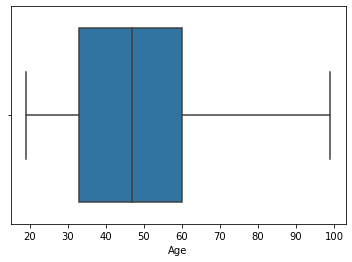

In [211]:
# Use boxplot to check for outliers
sbn.boxplot(x=df["Age"])

#### Drop Age outliers greater than 100 and less than or equal 10

In [184]:
#Drop age outlier
index = df[(df['Age'] > 100)|(df['Age'] <= 10)].index
df.drop(index, inplace=True)
df['Age'].describe()

count    81649.000000
mean        47.405406
std         17.380114
min         19.000000
25%         33.000000
50%         47.000000
75%         60.000000
max         99.000000
Name: Age, dtype: float64

In [32]:
#Delete rows with age = -1 since a person cannot be -1 years old
df = df[df.Age != -1]

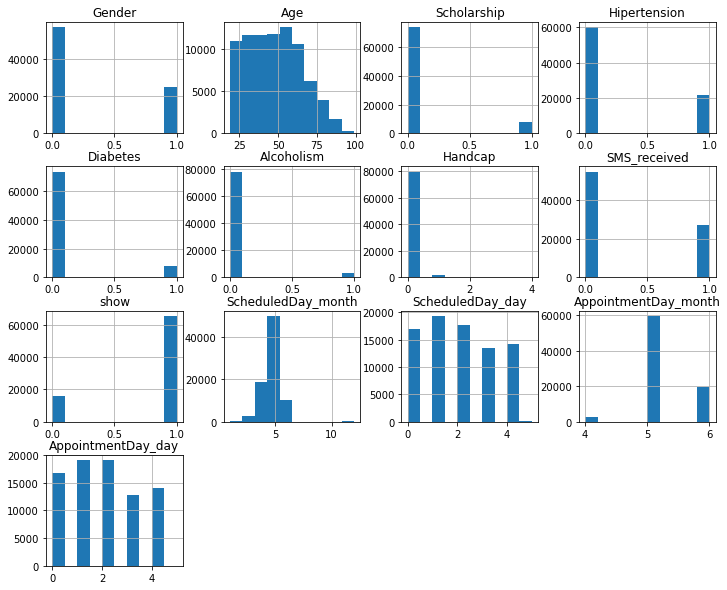

In [216]:
#df.info()
#Histogram figure of the data features
df.hist(figsize=(12,10));

<a id='eda'></a>
## Exploratory Data Analysis

Computing statistics and creating visualizations with the goal of addressing the research questions that I posed in the introduction section.

In [34]:
#Count of people who showed up(N0) and people who did not show up(Yes)
df.show.value_counts()

1    88207
0    22319
Name: show, dtype: int64

Text(0.5, 1.0, 'Proportion of Show')

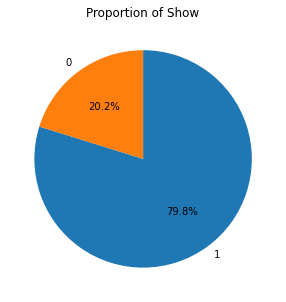

In [35]:
#Histogram plot for patients who showed up and patients who did not show up
show_counts=df.show.value_counts()
#Bar Plot
plt.figure(figsize = [10, 5])
plt.pie(show_counts,labels = show_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.title('Proportion of Show')

It appears 88207 patients showed up for their scheduled appointment out of 110527 patients being investigated which represents 79.8%

### Research Question 1 (Does the day of the week and month appointment was scheduled for influence  show up?)

In [38]:
#Counting the number of patient who showed up or did not show up based on day of the week
Show_day_counts=df.groupby('show')['AppointmentDay_day'].value_counts(sort=False)
Show_day_counts

show  AppointmentDay_day
0     0                      4690
      1                      5152
      2                      5093
      3                      3338
      4                      4037
      5                         9
1     0                     18024
      1                     20488
      2                     20774
      3                     13909
      4                     14982
      5                        30
Name: AppointmentDay_day, dtype: int64

<AxesSubplot:xlabel='AppointmentDay_day'>

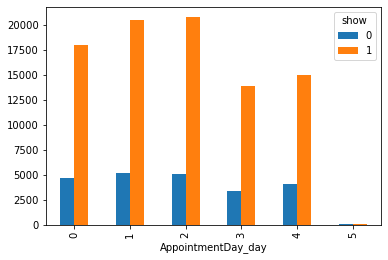

In [39]:
# Count of AppointmentDay_day Show
df.groupby("AppointmentDay_day").show.value_counts().unstack(level=1).plot(kind='bar')

<AxesSubplot:xlabel='AppointmentDay_month'>

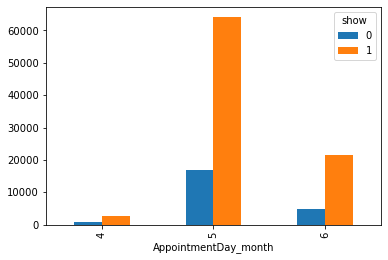

In [41]:
# Count of AppointmentDay_month Show
df.groupby("AppointmentDay_month").show.value_counts().unstack(level=1).plot(kind='bar')

### Observation
- From the visualization above, it appears most appointments are scheduled for Monday and Tuesday with Friday recording the less AppointmentDay.
- The month of May record the most appoitment

### Research Question 2 (Does the day of the week and month of ScheduledDay was scheduled for influence  show up?)

In [46]:
#Counting the number of patient who showed up or did not show up based on day of the week
Show_Schday_counts=df.groupby('show')['ScheduledDay_month'].value_counts(sort=False)
Show_Schday_counts

show  ScheduledDay_month
0     1                        18
      2                        82
      3                      1196
      4                      7849
      5                     11769
      6                      1386
      12                       19
1     1                        42
      2                       199
      3                      2418
      4                     17490
      5                     55652
      6                     12363
      11                        1
      12                       42
Name: ScheduledDay_month, dtype: int64

<AxesSubplot:xlabel='ScheduledDay_day'>

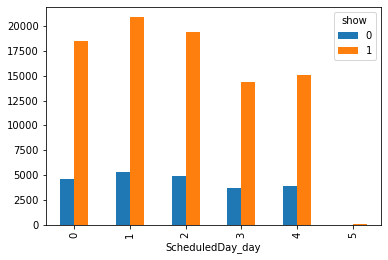

In [43]:
# Count of ScheduledDay_day Show
df.groupby("ScheduledDay_day").show.value_counts().unstack(level=1).plot(kind='bar')


<AxesSubplot:xlabel='ScheduledDay_day'>

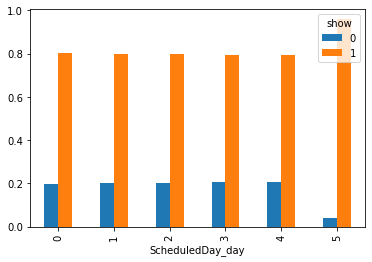

In [47]:
# Relative frequency of ScheduledDay_day Show
df.groupby("ScheduledDay_day").show.value_counts(normalize=True).unstack(level=1).plot(kind='bar')


<AxesSubplot:xlabel='ScheduledDay_month'>

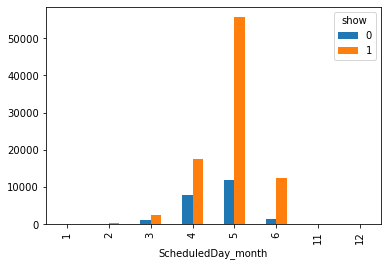

In [49]:
#Count of ScheduledDay_month Show
df.groupby("ScheduledDay_month").show.value_counts().unstack(level=1).plot(kind='bar')

<AxesSubplot:xlabel='ScheduledDay_month'>

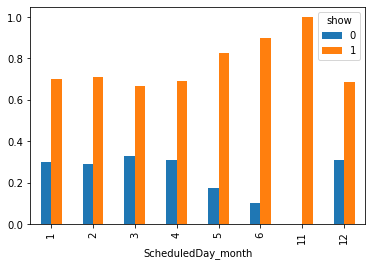

In [50]:
# Relative frequency of ScheduledDay_month Show
df.groupby("ScheduledDay_month").show.value_counts(normalize=True).unstack(level=1).plot(kind='bar')

### Observation
From the visualization above, even though Monday and Tuesday records the highest number of show, it does not influence the show up given the proportion.
However, most ScheduledDay month was recorded in May with June recording the height percent of showup.

### Research Question 3 (Does receiving SMS before scheduled appointment affect show up?)

In [51]:
Show_SMS_counts=df.groupby('show')['SMS_received'].value_counts(sort=False)
Show_SMS_counts

show  SMS_received
0     0               12535
      1                9784
1     0               62509
      1               25698
Name: SMS_received, dtype: int64

<AxesSubplot:xlabel='SMS_received'>

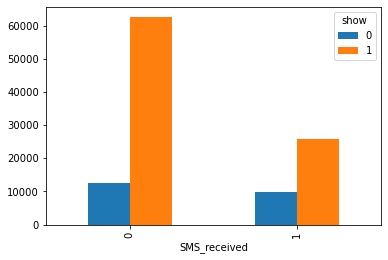

In [52]:
# Count of SMS_received Show
df.groupby("SMS_received").show.value_counts().unstack(level=1).plot(kind='bar')

<AxesSubplot:xlabel='SMS_received'>

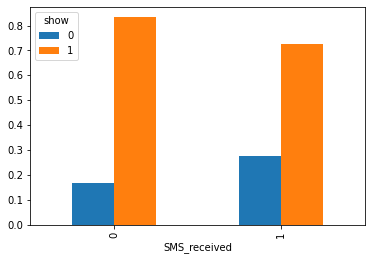

In [53]:
# Relative frequency of SMS_received Show
df.groupby("SMS_received").show.value_counts(normalize=True).unstack(level=1).plot(kind='bar')

It appears, majority of patients did not receive SMS as a reminder before their appointment. This may be due to the facility not having their contact numbers or the patients not having phones etc.

### Observation on SMS received
From analysis, it appears patients who show up for their appointment more do not even received an SMS before the scheduled appointment.\
On the other hand, patients who receive SMS before their scheduled appointment show up less. Therefore receiving SMS before appointment does not guarentee show up.


<a id='eda'></a>

### Research Question 4 (Does having a Scholarship affect Show up for appointment?)

In [54]:
Show_Sch_counts=df.groupby('show')['Scholarship'].value_counts(sort=False)
Show_Sch_counts

show  Scholarship
0     0              19741
      1               2578
1     0              79924
      1               8283
Name: Scholarship, dtype: int64

<AxesSubplot:xlabel='Scholarship'>

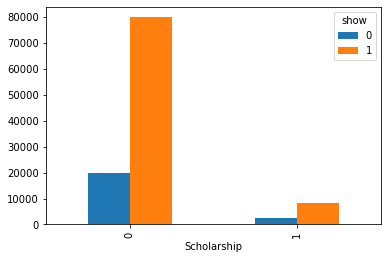

In [55]:
# Count of Scholarship Show
df.groupby("Scholarship").show.value_counts().unstack(level=1).plot(kind='bar')

<AxesSubplot:xlabel='Scholarship'>

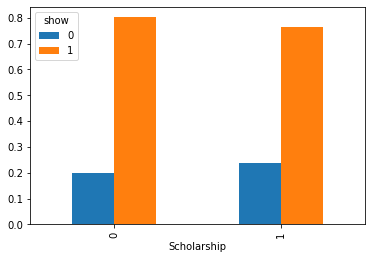

In [56]:
# Relative frequency of Scholarship Show
df.groupby("Scholarship").show.value_counts(normalize=True).unstack(level=1).plot(kind='bar')

### Observation on Scholarship
From analysis, most show did not have scholarship. The ralative frequency of show up to no show up in relation to scholarship is almost the same
Therefore having a Scholarship or not with the Brasilian welfare program Bolsa Família does not guarantee that you will show up for your scheduled appointment.

### Research Question 5 (Does the Age class of a person influence showing up for appointment?)

<AxesSubplot:xlabel='Age', ylabel='Count'>

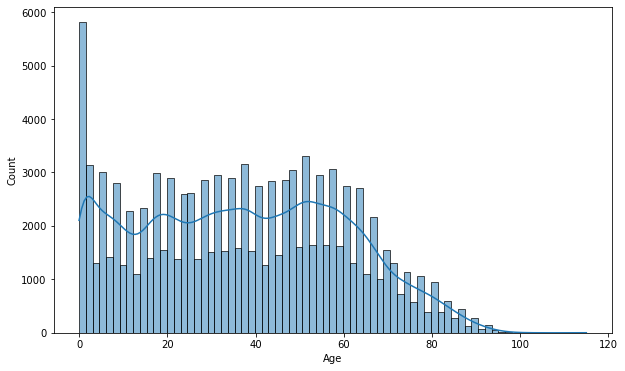

In [128]:
plt.figure(figsize = [10, 6])

sbn.histplot(df, x='Age',kde=True)

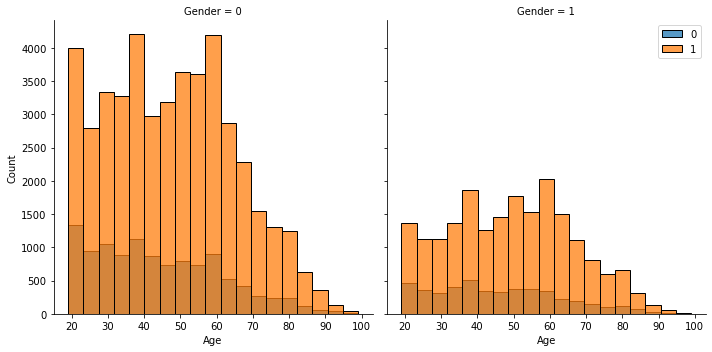

In [209]:
bins = np.linspace(df.Age.min(), df.Age.max(), 20)
g = sbn.FacetGrid(df, col="Gender", hue="show", col_wrap=2, height=5)
g.map(sbn.histplot, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [185]:
#finding the mean age of people who show up or does not show up for their appointment
df.groupby('show')['Age'].mean()

show
0    44.485942
1    48.115225
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

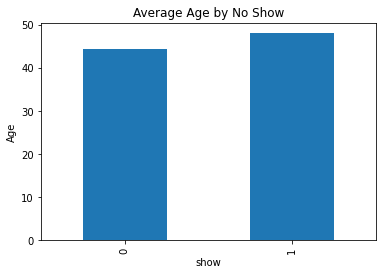

In [186]:
#Plot of average age of people who show up or does not show up for their appointment
df.groupby('show')['Age'].mean().plot(kind='bar', title='Average Age by No Show')
plt.xlabel('show')
plt.ylabel('Age')

It appears the average age of patients who show up for scheduled appointment is approximately 44 and the average age of patients who does not shows up for scheduled appointment is approximately 48. 

In [212]:
# Create Bin edges to "cut" the age data into groups('Child','Teenage','Adult','Senior Adult')
bin_edges = [ 10 ,19 , 59, 115] 
bin_names=['Child/Teenager','Adult','Senior Adult']
df['Age_class']=pd.cut(df['Age'],bin_edges,labels=bin_names)
df.tail()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledDay_month,ScheduledDay_day,AppointmentDay_month,AppointmentDay_day,Age_class
110522,0,56,MARIA ORTIZ,0,0,0,0,0,1,1,5,1,6,1,Adult
110523,0,51,MARIA ORTIZ,0,0,0,0,0,1,1,5,1,6,1,Adult
110524,0,21,MARIA ORTIZ,0,0,0,0,0,1,1,4,2,6,1,Adult
110525,0,38,MARIA ORTIZ,0,0,0,0,0,1,1,4,2,6,1,Adult
110526,0,54,MARIA ORTIZ,0,0,0,0,0,1,1,4,2,6,1,Adult


In [213]:
#getting the count of the age classes in the dataset
df['Age_class'].value_counts()
#df.groupby(['Age_class']).count()

Adult             58942
Senior Adult      21162
Child/Teenager     1545
Name: Age_class, dtype: int64

<AxesSubplot:xlabel='Age_class'>

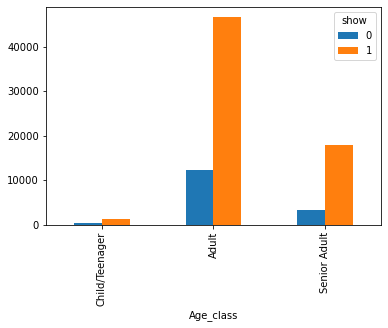

In [214]:
# Count of Age_class Show

df.groupby("Age_class").show.value_counts().unstack(level=1).plot(kind='bar')

<AxesSubplot:xlabel='Age_class'>

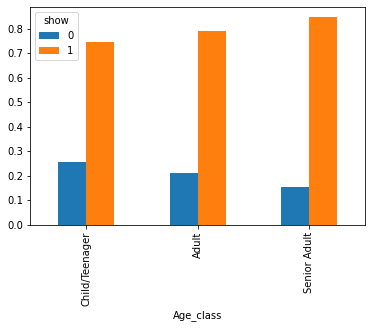

In [215]:
# Relative frequency of Age_class Show
df.groupby("Age_class").show.value_counts(normalize=True).unstack(level=1).plot(kind='bar')

There are more adults patients than other age group considering the visualisation above. 

### Observation on Age
In my analysis, given the ratio of showing up and not showing up for appointment for a Senior Adult, it appears Senior Adults are more likely to show up for scheduled appointment. Child/Teenage and Adult patients are less likely to show up for a scheduled appointment.

### Research Question 6 (Does the Gender of a person influence Showing up for appointment?)

In [107]:
#Count of each gender
df.Gender.value_counts()


0    71839
1    38687
Name: Gender, dtype: int64

In [109]:
#COunt of Gender based on No Show
df.groupby('Gender')['show'].value_counts()

Gender  show
0       1       57245
        0       14594
1       1       30962
        0        7725
Name: show, dtype: int64

<AxesSubplot:xlabel='Gender'>

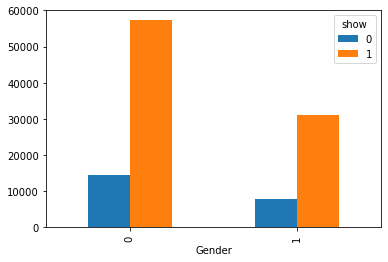

In [110]:
# Count of Gender Show
df.groupby("Gender").show.value_counts().unstack(level=1).plot(kind='bar')

<AxesSubplot:xlabel='Gender'>

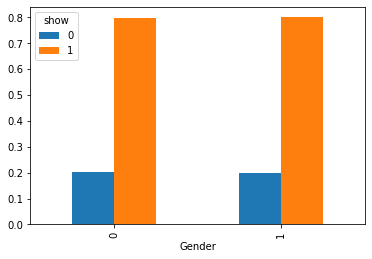

In [111]:
# Relative frequency of Gender Show
df.groupby("Gender").show.value_counts(normalize=True).unstack(level=1).plot(kind='bar')

Clearly, there are more female than the male gender showing up or not showing up for appointments

### Observation on Gender
Considering the above visualization, gender is not a strong variable to determine if a patient will show up for an appointment or not since the proportion of both male and female for showing up or not showing up for appointment is almost the same.

### Research Question 7 (Does the Neigbourhood a person lives in influence Showing up for appointment?)

In [112]:
#number of unique neighbourhood
df.Neighbourhood.nunique()

81

In [114]:
#Count of patients who showed up or does not show up based on Neighbourhood
df.groupby('Neighbourhood').count()['show']

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: show, Length: 81, dtype: int64

<AxesSubplot:xlabel='Neighbourhood'>

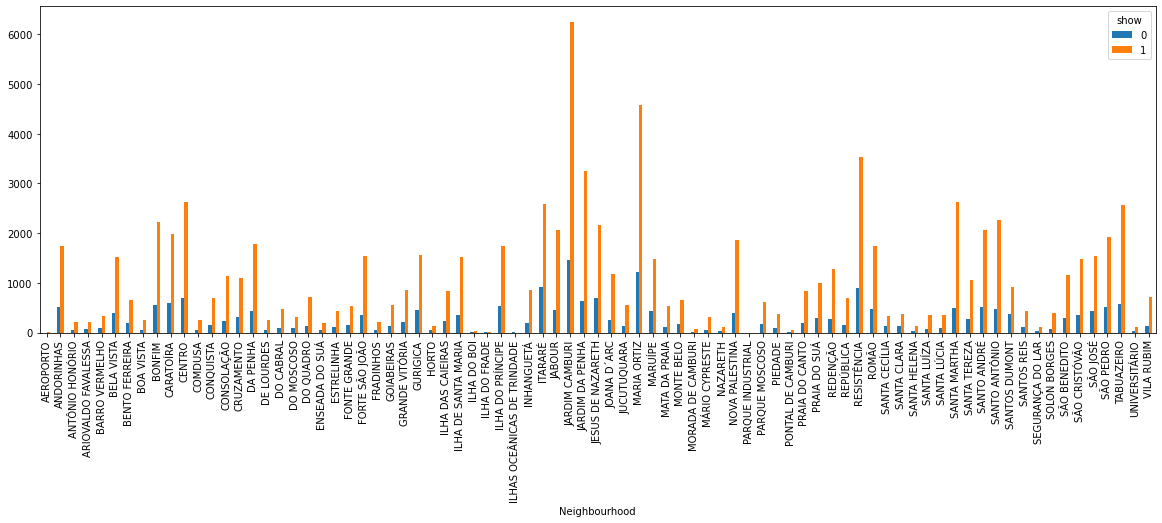

In [133]:
# Count of Neighbourhood Show
df.groupby("Neighbourhood").show.value_counts().unstack(level=1).plot(kind='bar', figsize=(20,6))


### Observation on Neighbourhood
Given the visualization, From observation, it appears patients from JARDIM CAMBURI and MARIA ORTIZ neighbourhood happen to show up more for appointments as compared to patients from MARUÍPE. Therefore, the Neigbourhood a patients lives in greatly affects whether or not a patients shows up for a scheduled appointment since the location of the closer the facility is to a neigbourhood, the more probable it is for a patient to show up. Transportation availability and cost of transportation from a patients neighbourhood to the facility is another factor which may affect show up for appointment.

### Check Correlation

In [136]:
#Check the correlation between features 
df.corr()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledDay_month,ScheduledDay_day,AppointmentDay_month,AppointmentDay_day
Gender,1.000000,-0.106452,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,0.004122,0.013338,0.004841,-0.006040,0.003907
Age,-0.106452,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327,-0.003016,0.011381,0.014572,0.003068
Scholarship,-0.114296,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134,0.016817,-0.004967,-0.002583,-0.000677
Hipertension,-0.055722,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704,0.025000,0.000679,0.003786,0.003449
Diabetes,-0.032556,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181,0.025600,-0.000387,0.003745,0.006611
Alcoholism,0.106166,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197,0.028774,0.006628,0.003922,0.002699
Handcap,0.022813,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077,0.014955,0.000610,-0.001477,0.004350
SMS_received,-0.046302,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428,-0.294083,0.078548,0.108082,-0.089867
show,0.004122,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000,0.160856,-0.006014,0.020879,-0.001158
ScheduledDay_month,0.013338,-0.003016,0.016817,0.025000,0.025600,0.028774,0.014955,-0.294083,0.160856,1.000000,-0.031724,0.527615,-0.043002


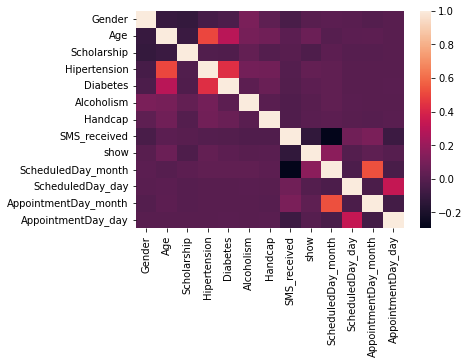

In [141]:
sbn.heatmap(df.corr());

- Check the correlation between features to determine if I need to do feature selection or using a regularization technique(Lasso, ridge) to prevent overfitting.

<a id='mod'></a>
## Modelling

#### Define X by selecting the following features:

In [222]:
X=df.drop(columns=['show','Neighbourhood', 'Age_class'],axis=1)
X.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_month,ScheduledDay_day,AppointmentDay_month,AppointmentDay_day
0,0,62,0,1,0,0,0,0,4,4,4,4
1,1,56,0,0,0,0,0,0,4,4,4,4
2,0,62,0,0,0,0,0,0,4,4,4,4
4,0,56,0,1,1,0,0,0,4,4,4,4
5,0,76,0,1,0,0,0,0,4,2,4,4


#### Define the target variable y

In [218]:
y=df['show']
y.head()

0    1
1    1
2    1
4    1
5    1
Name: show, dtype: int64

### Classification 

Now use the training set to build an accurate model. GridSearchCV library is used to for every combination of hyperparameters and chooses the one with the best performance to train the model. Then use the test set to report the f1-score/accuracy of the model
The following algorithm is used:
- K Nearest Neighbor(KNN)
- Logistics Regression
- Random Forest
- AdaBoost

#### Importing libraries


In [219]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

### Train Test split

In [220]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (65319, 13) (65319,)
Test set: (16330, 13) (16330,)


### K Nearest Neighbor (KNN)

In [221]:
param_grid = {'n_neighbors': [int(x) for x in np.linspace(1, 10, num = 10)]}
knn = KNeighborsClassifier()
knn_model = GridSearchCV(estimator = knn, param_grid = param_grid,scoring= 'f1', 
                          cv = 5, n_jobs=-1 , verbose = 1)

knn_model.fit(x_train, y_train)

best_knn = knn_model.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\w10014629\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\w10014629\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\w10014629\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\w10014629\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", mult

ValueError: could not convert string to float: 'JARDIM DA PENHA'

In [199]:
# Prediction and check f1-score of the validation set
knn_pred=best_knn.predict(x_test)
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.09      0.35      0.14       784
           1       0.96      0.81      0.88     15546

    accuracy                           0.79     16330
   macro avg       0.52      0.58      0.51     16330
weighted avg       0.92      0.79      0.84     16330



### Logistics Regression

In [200]:
logreg = LogisticRegression()
params = {
 'random_state':[0]
        }


logreg_model = GridSearchCV(logreg, params, n_jobs=-1, 
                   cv=3, scoring= 'f1', verbose=1)

logreg_model.fit(x_train,y_train)

best_logreg = logreg_model.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\w10014629\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
# Prediction and check f1-score, recall and precision of the validation set
logreg_pred=best_logreg.predict(x_test)
print(classification_report(logreg_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.29      0.01        52
           1       1.00      0.80      0.89     16278

    accuracy                           0.80     16330
   macro avg       0.50      0.54      0.45     16330
weighted avg       0.99      0.80      0.89     16330



### Random Forest

In [202]:
max_features = ['auto', 'sqrt']
min_samples_split = [2]
min_samples_leaf = [1]
bootstrap = [True]

param_grid = {'n_estimators': [20,40,50,60,100],
              'max_depth':[None],
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier()
rf_model = GridSearchCV(estimator = rf, param_grid = param_grid, scoring= 'f1', 
                          cv = 5, n_jobs=-1, verbose = 2)

rf_model.fit(x_train, y_train)

best_rf = rf_model.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [203]:
# Prediction and check f1-score of the validation set
rf_pred=best_rf.predict(x_test)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25      1986
           1       0.90      0.82      0.86     14344

    accuracy                           0.76     16330
   macro avg       0.55      0.57      0.55     16330
weighted avg       0.81      0.76      0.78     16330



Text(0.5, 0, 'Random Forest Feature Importance')

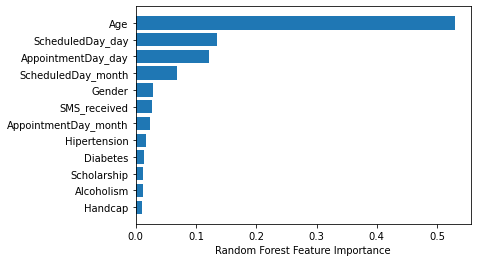

In [204]:
sorted_idx = best_rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], best_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### AdaBoost

In [205]:
ada = AdaBoostClassifier()
params = {
'n_estimators':[100], 'random_state':[0]
        }


ada_model = GridSearchCV(ada, params, n_jobs=-1, 
                   cv=3, scoring= 'f1', verbose=1)

ada_model.fit(x_train,y_train)

best_ada = ada_model.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [206]:
# Prediction and check f1-score, recall and precision of the validation set
ada_pred=best_ada.predict(x_test)
print(classification_report(ada_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.60      0.01        20
           1       1.00      0.80      0.89     16310

    accuracy                           0.80     16330
   macro avg       0.50      0.70      0.45     16330
weighted avg       1.00      0.80      0.89     16330



Text(0.5, 0, 'AdaBoost Feature Importance')

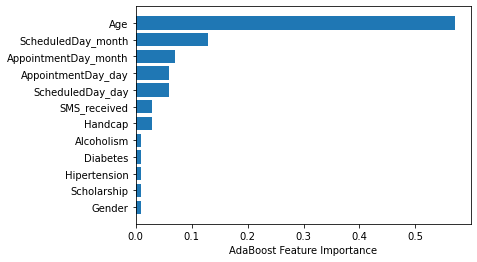

In [207]:
sorted_idx = best_ada.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], best_ada.feature_importances_[sorted_idx])
plt.xlabel("AdaBoost Feature Importance")

<a id='report'></a>
## Report
Report on the accuracy of the built model using different evaluation metrics:

| Algorithm              | F1-score | 
|------------------------|----------|
| KNN                    | 0.88     |
| Logistics Regression   | 0.89     |
| Random Forest          | 0.86     | 
| AdaBoost               | 0.89     | 